# 検索結果の画像を表示するために利用

## 手順
- 埋め込み用notebookでpickle保存したtopN_id_listを読込
- pickle保存したtest_pairsを読み込み
- test_pairsとtopN_id_listをfor zip()で順に見ていき検索結果を表示する

In [81]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
f = open('test_pairs.txt','rb')
test_pairs = pickle.load(f)

- Singleモデル

In [79]:
f = open('./model/T_Shirt/Single/a0.1/512/topN_id_list99.txt','rb')
TopNid_list = pickle.load(f)
aaa = []
for a in TopNid_list:
    TopNid = [int(s) for s in a]
    aaa.append(TopNid)
TopNid_list = aaa
savedir='./img_retrieval/Single/512/'

- Dual(TripletLoss)モデル

In [82]:
f = open('./model/T_Shirt/tripletloss/a0.1/512/topN_id_list99.txt','rb')
TopNid_list = pickle.load(f)
aaa = []
for a in TopNid_list:
    TopNid = [int(s) for s in a]
    aaa.append(TopNid)
TopNid_list = aaa
savedir = './img_retrieval/Dual/TripletLoss/512/'

- Dual(Improved)モデル

In [84]:
f = open('./model/T_Shirt/improved_tripletloss/a0.1b0.05/300/topN_id_list99.txt','rb')
TopNid_list = pickle.load(f)
aaa = []
for a in TopNid_list:
    TopNid = [int(s) for s in a]
    aaa.append(TopNid)
TopNid_list = aaa
savedir = './img_retrieval/Dual/Improved/300/'

- 描画設定用関数
- 同じアイテムに枠を付ける



In [62]:
def showimg(title,filepath,flag):
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.title(title)
    plt.tick_params(color='white')
    img = Image.open(filepath)
    if flag:
        img = np.array(img)
        img = np.array([np.pad(img[:,:,0], (8,8), 'constant', constant_values=(255,255)),np.pad(img[:,:,1], (8,8), 'constant',constant_values=(0,0)),np.pad(img[:,:,2], (8,8), 'constant',constant_values=(0,0))])
        img = img.transpose(1,2,0)
    plt.imshow(np.asarray(img)) 

In [68]:
def calc_top5(test_pairs):
    top5 = []
    for Nid in topNid[:5]:
        for a in test_pairs:
            if a[0] == Nid:
                top5.append([a[0],a[1][1]])
    print(top5)
    return top5

./dataset/T_Shirt_all/id_00010696/comsumer_01.jpg
[14523, 25239, 5295, 14379, 8232]
[[14523, './dataset/T_Shirt_all/id_00014523/shop_01.jpg'], [25239, './dataset/T_Shirt_all/id_00025239/shop_01.jpg'], [5295, './dataset/T_Shirt_all/id_00005295/shop_01.jpg'], [14379, './dataset/T_Shirt_all/id_00014379/shop_01.jpg'], [8232, './dataset/T_Shirt_all/id_00008232/shop_01.jpg']]


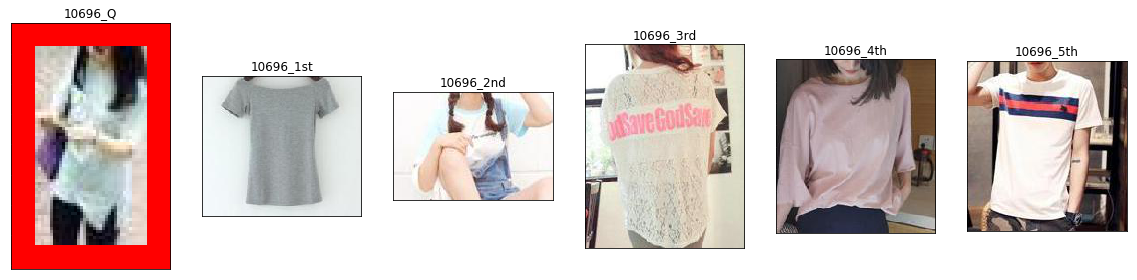

./dataset/T_Shirt_all/id_00023825/comsumer_01.jpg
[21502, 9488, 26937, 8586, 19149]
[[21502, './dataset/T_Shirt_all/id_00021502/shop_01.jpg'], [9488, './dataset/T_Shirt_all/id_00009488/shop_03.jpg'], [26937, './dataset/T_Shirt_all/id_00026937/shop_01.jpg'], [8586, './dataset/T_Shirt_all/id_00008586/shop_02.jpg'], [19149, './dataset/T_Shirt_all/id_00019149/shop_01.jpg']]


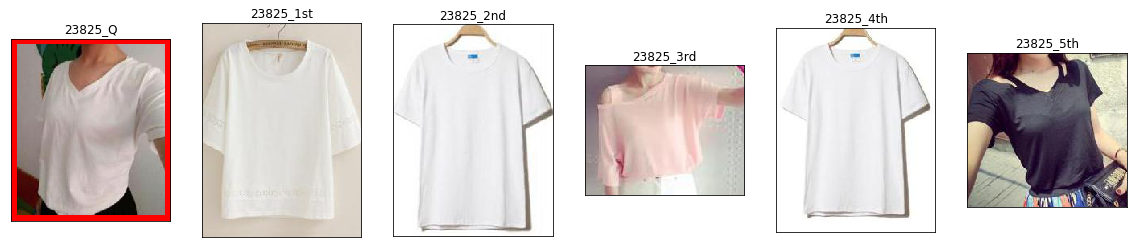

./dataset/T_Shirt_all/id_00017789/comsumer_01.jpg
[20855, 16153, 19193, 12173, 16786]
[[20855, './dataset/T_Shirt_all/id_00020855/shop_01.jpg'], [16153, './dataset/T_Shirt_all/id_00016153/shop_01.jpg'], [19193, './dataset/T_Shirt_all/id_00019193/shop_01.jpg'], [12173, './dataset/T_Shirt_all/id_00012173/shop_01.jpg'], [16786, './dataset/T_Shirt_all/id_00016786/shop_01.jpg']]


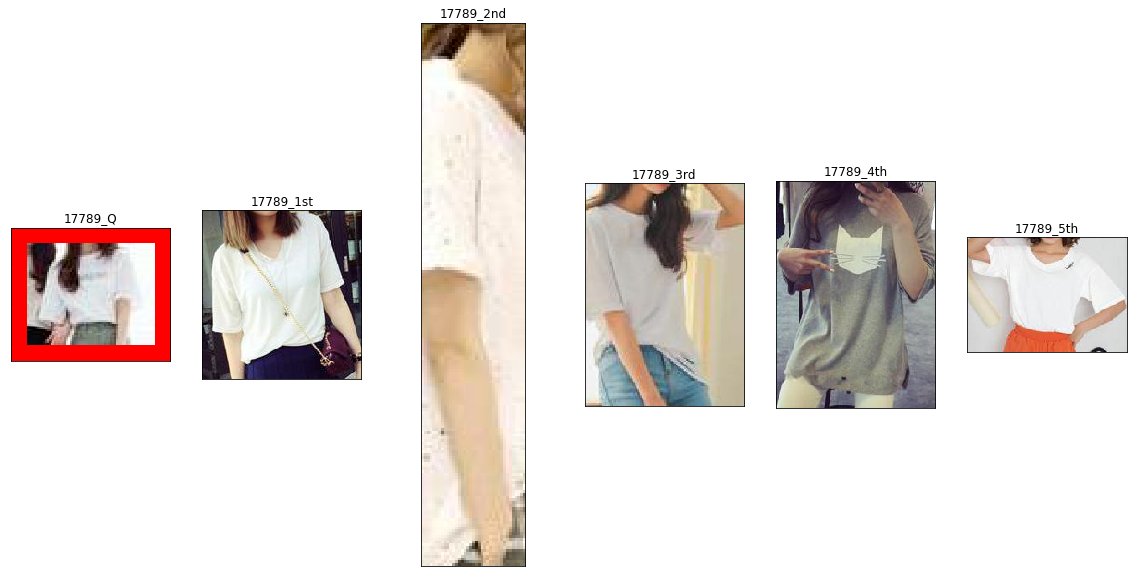

./dataset/T_Shirt_all/id_00022720/comsumer_01.jpg
[20578, 5663, 14636, 26391, 30033]
[[20578, './dataset/T_Shirt_all/id_00020578/shop_01.jpg'], [5663, './dataset/T_Shirt_all/id_00005663/shop_01.jpg'], [14636, './dataset/T_Shirt_all/id_00014636/shop_03.jpg'], [26391, './dataset/T_Shirt_all/id_00026391/shop_01.jpg'], [30033, './dataset/T_Shirt_all/id_00030033/shop_01.jpg']]


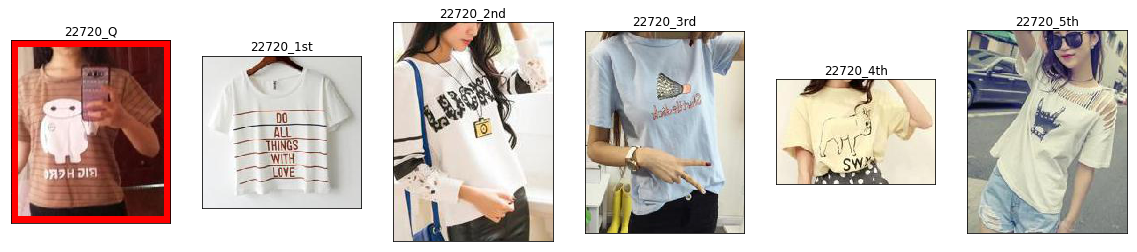

./dataset/T_Shirt_all/id_00003304/comsumer_05.jpg
[15499, 21093, 18856, 13569, 29630]
[[15499, './dataset/T_Shirt_all/id_00015499/shop_01.jpg'], [21093, './dataset/T_Shirt_all/id_00021093/shop_01.jpg'], [18856, './dataset/T_Shirt_all/id_00018856/shop_01.jpg'], [13569, './dataset/T_Shirt_all/id_00013569/shop_01.jpg'], [29630, './dataset/T_Shirt_all/id_00029630/shop_01.jpg']]


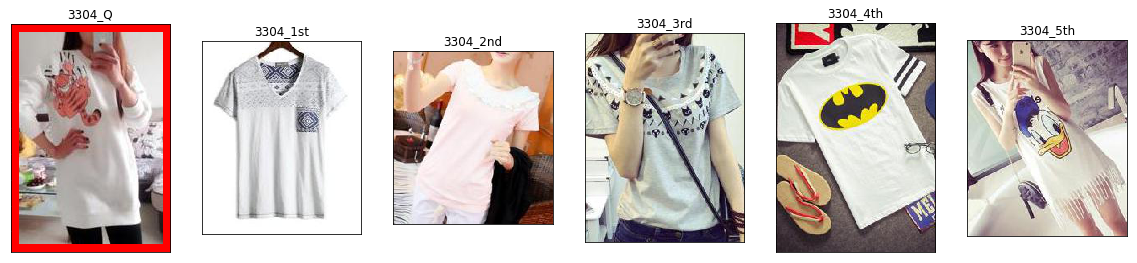

./dataset/T_Shirt_all/id_00021665/comsumer_01.jpg
[11308, 18751, 12139, 15691, 22976]
[[11308, './dataset/T_Shirt_all/id_00011308/shop_01.jpg'], [18751, './dataset/T_Shirt_all/id_00018751/shop_01.jpg'], [12139, './dataset/T_Shirt_all/id_00012139/shop_01.jpg'], [15691, './dataset/T_Shirt_all/id_00015691/shop_01.jpg'], [22976, './dataset/T_Shirt_all/id_00022976/shop_01.jpg']]


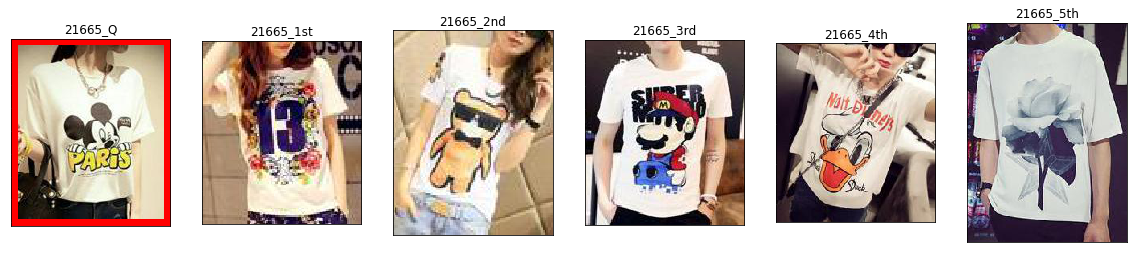

./dataset/T_Shirt_all/id_00029754/comsumer_01.jpg
[30653, 20424, 28432, 13809, 24305]
[[30653, './dataset/T_Shirt_all/id_00030653/shop_02.jpg'], [20424, './dataset/T_Shirt_all/id_00020424/shop_01.jpg'], [28432, './dataset/T_Shirt_all/id_00028432/shop_01.jpg'], [13809, './dataset/T_Shirt_all/id_00013809/shop_01.jpg'], [24305, './dataset/T_Shirt_all/id_00024305/shop_01.jpg']]


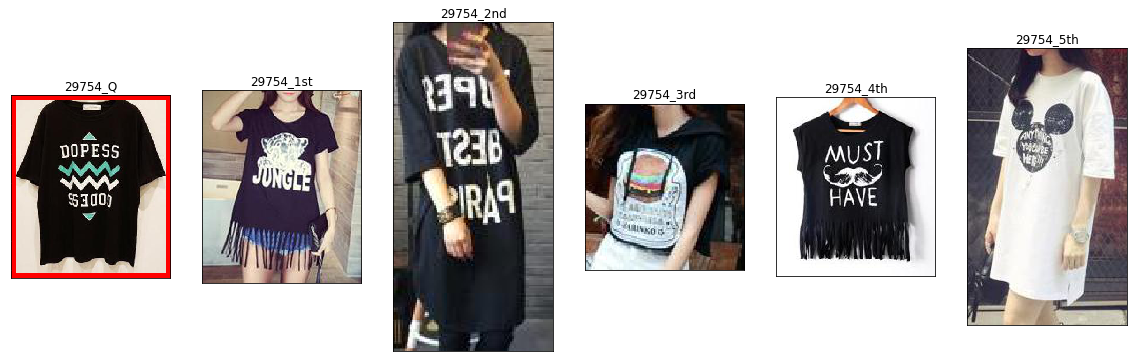

./dataset/T_Shirt_all/id_00016530/comsumer_01.jpg
[5930, 11577, 13886, 21339, 20476]
[[5930, './dataset/T_Shirt_all/id_00005930/shop_01.jpg'], [11577, './dataset/T_Shirt_all/id_00011577/shop_01.jpg'], [13886, './dataset/T_Shirt_all/id_00013886/shop_01.jpg'], [21339, './dataset/T_Shirt_all/id_00021339/shop_01.jpg'], [20476, './dataset/T_Shirt_all/id_00020476/shop_01.jpg']]


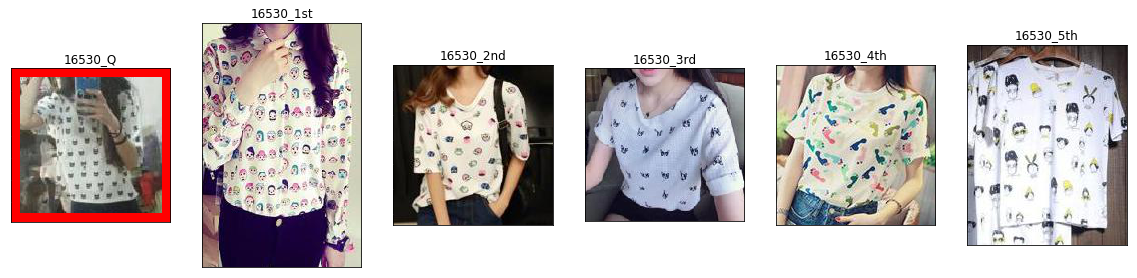

./dataset/T_Shirt_all/id_00023988/comsumer_01.jpg
[9310, 17991, 13955, 16334, 6290]
[[9310, './dataset/T_Shirt_all/id_00009310/shop_01.jpg'], [17991, './dataset/T_Shirt_all/id_00017991/shop_01.jpg'], [13955, './dataset/T_Shirt_all/id_00013955/shop_01.jpg'], [16334, './dataset/T_Shirt_all/id_00016334/shop_01.jpg'], [6290, './dataset/T_Shirt_all/id_00006290/shop_01.jpg']]


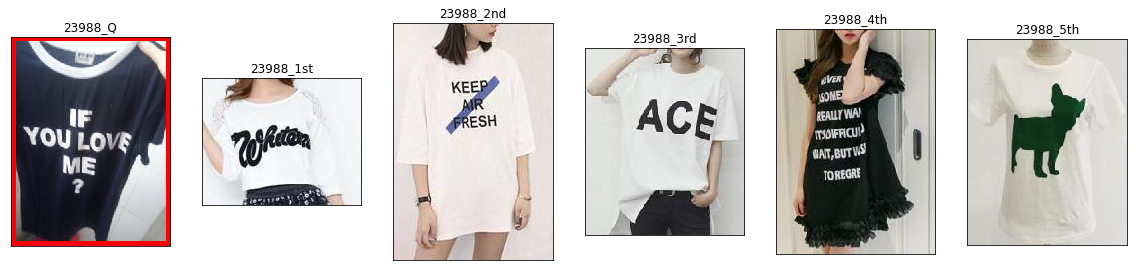

./dataset/T_Shirt_all/id_00020189/comsumer_01.jpg
[10229, 20720, 20189, 31687, 18722]
[[10229, './dataset/T_Shirt_all/id_00010229/shop_01.jpg'], [20720, './dataset/T_Shirt_all/id_00020720/shop_01.jpg'], [20189, './dataset/T_Shirt_all/id_00020189/shop_01.jpg'], [31687, './dataset/T_Shirt_all/id_00031687/shop_01.jpg'], [18722, './dataset/T_Shirt_all/id_00018722/shop_01.jpg']]


KeyboardInterrupt: 

In [86]:
start = 0
end = 50

for tp,topNid in zip(test_pairs[start:end],TopNid_list[start:end]):
    
    print(tp[1][0])
    print(topNid[:5])
    
    top5 = calc_top5(test_pairs)
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(1,6,1)
    showimg(title='{}_Q'.format(tp[0]),filepath=tp[1][0],flag=(tp[0]==tp[0]))
    plt.subplot(1,6,2)
    showimg(title='{}_1st'.format(tp[0]),filepath=top5[0][1],flag=(tp[0]==top5[0][0]))
    plt.subplot(1,6,3)
    showimg(title='{}_2nd'.format(tp[0]),filepath=top5[1][1],flag=(tp[0]==top5[1][0]))
    plt.subplot(1,6,4)
    showimg(title='{}_3rd'.format(tp[0]),filepath=top5[2][1],flag=(tp[0]==top5[2][0]))    
    plt.subplot(1,6,5)
    showimg(title='{}_4th'.format(tp[0]),filepath=top5[3][1],flag=(tp[0]==top5[3][0]))    
    plt.subplot(1,6,6)
    showimg(title='{}_5th'.format(tp[0]),filepath=top5[4][1],flag=(tp[0]==top5[4][0]))
    
#     plt.savefig('{}{}.png'.format(savedir,tp[0]),bbox_inches="tight")
    plt.show()

In [ ]:
#     fig = plt.figure(figsize=(20,10))
#     plt.subplot(1,6,1)
#     top2 = Image.open(top5[1])
    
#     fig = plt.figure(figsize=(20,10))
#     plt.subplot(1,6,1)
#     top3 = Image.open(top5[2])
#     top4 = Image.open(top5[3])
#     top5 = Image.open(top5[4])